In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma_u = 7
vp = 10
sigma_p = 3
epoch = 20000
infer_time = 5000
attention_time = 10
dt = 0.01  # 0.01 
lr = 0.005  # 0.0045
blur_lim = 1e-8

vs = [np.random.normal(12, np.sqrt(2)) for i in range(epoch)]
vps = []
sigma_ps = []
sigma_us = []
eps_1 = []
eps_2 = []
eus = []

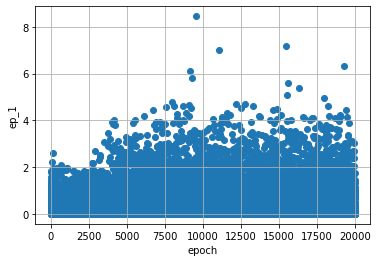

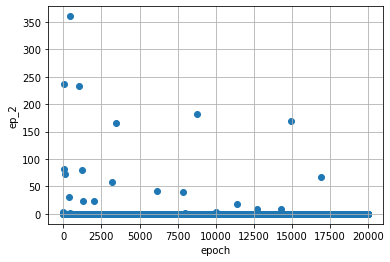

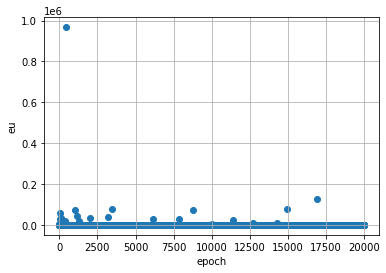

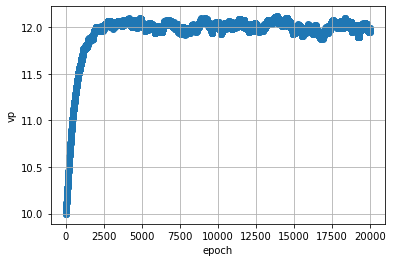

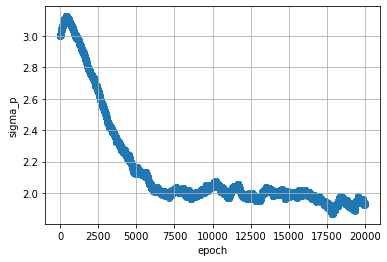

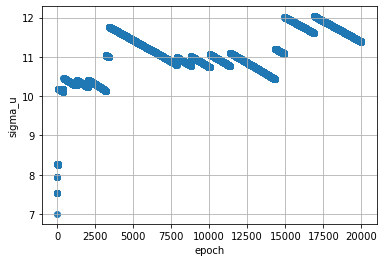

In [3]:
for i in range(epoch):
    v = vs[i]
    u = v * v
    end = False
    phi = vp
    phi_pre = phi
    phi_pre_2 = phi
    ep = 0
    ep_pre = ep
    ep_pre_2 = ep
    eu = 0
    eu_pre = eu
    eu_pre_2 = eu
    
    # 推測
    for j in range(1, infer_time):
        phi_pre_3 = phi_pre_2
        phi_pre_2 = phi_pre
        phi_pre = phi
        ep_pre_3 = ep_pre_2
        ep_pre_2 = ep_pre
        ep_pre = ep
        eu_pre_3 = eu_pre_2
        eu_pre_2 = eu_pre
        eu_pre = eu
        phi = phi_pre + dt * (-ep_pre + eu_pre * (2 * phi_pre))
        ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
        eu = eu_pre + dt * (u - phi_pre**2 - sigma_u * eu_pre)
        
#         phi = phi_pre + dt * (-ep_pre + eu_pre * 2)
#         ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
#         eu = eu_pre + dt * (u - phi_pre*2 - sigma_u * eu_pre)
        
        if j > 3:
#             blur = (phi - phi_pre)**2 + (phi_pre - phi_pre_2)**2 + (phi_pre_2 - phi_pre_3)**2
            blur = np.abs(phi - phi_pre) + np.abs(phi_pre - phi_pre_2) + np.abs(phi_pre_2 - phi_pre_3)
            if blur < blur_lim:
                end = True
            
        if end:
            break
    
    eps_1.append(ep * ep)
    eps_2.append((phi - v) ** 2)
    eus.append((phi**2 - u) ** 2)
    vps.append(vp)
    sigma_ps.append(sigma_p)
    sigma_us.append(sigma_u)
          
    # 注意
#     for j in range(attention_time):
#         vp = vp + ep * dt
#         sigma_p = max(sigma_p + 1/2 * (ep ** 2 - 1/sigma_p) * dt, 1)
#         sigma_u = max(sigma_u + 1/2 * (eu ** 2 - 1/sigma_u) * dt, 1) 
    vp = vp + ep * lr
    sigma_p = max(sigma_p + 1/2 * (ep ** 2 - 1/sigma_p) * lr, 1)
    sigma_u = max(sigma_u + 1/2 * (eu ** 2 - 1/sigma_u) * lr, 1) 
    
plt.scatter(range(epoch), eps_1)
plt.xlabel("epoch")
plt.ylabel("ep_1")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), eps_2)
plt.xlabel("epoch")
plt.ylabel("ep_2")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), eus)
plt.xlabel("epoch")
plt.ylabel("eu")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), vps)
plt.xlabel("epoch")
plt.ylabel("vp")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), sigma_ps)
plt.xlabel("epoch")
plt.ylabel("sigma_p")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), sigma_us)
plt.xlabel("epoch")
plt.ylabel("sigma_u")
plt.plot()
plt.grid()
plt.show()

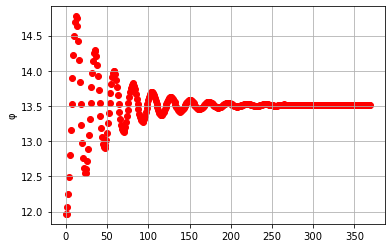

v: 13.52696899690074
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 13.513685136015996
u: 182.9788902431138
g(phi): 182.61968595537965


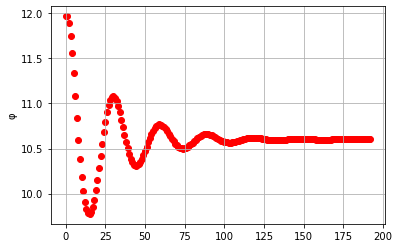

v: 10.58491529649329
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 10.601050113758006
u: 112.04043183393765
g(phi): 112.38226351440863


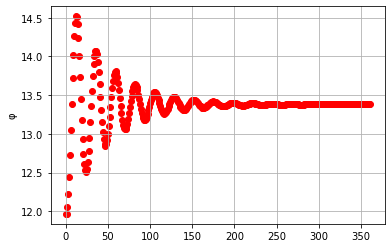

v: 13.394038176298292
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 13.38305349080849
u: 179.40025866813608
g(phi): 179.10612073784128


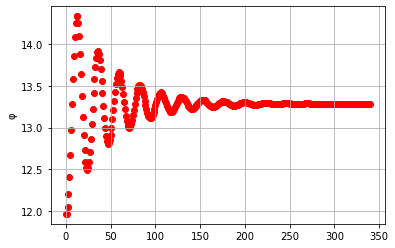

v: 13.295555665890369
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 13.285364081833253
u: 176.7718004647895
g(phi): 176.5008987868651


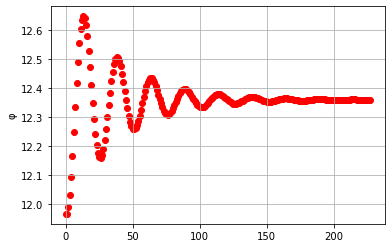

v: 12.363362203070693
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 12.358730588667038
u: 152.85272496431702
g(phi): 152.73822176325433


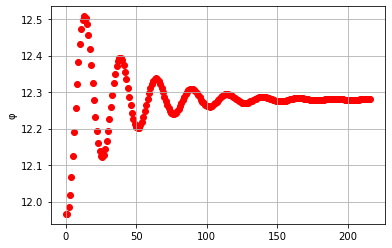

v: 12.282936990046007
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 12.280759757775863
u: 150.87054110144047
g(phi): 150.81706022820708


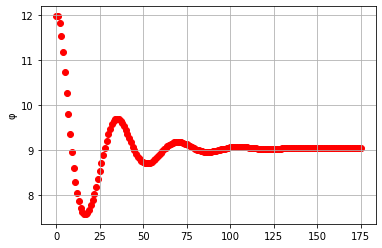

v: 8.982640665737296
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 9.03591954091536
u: 80.68783332975738
g(phi): 81.64784194989606


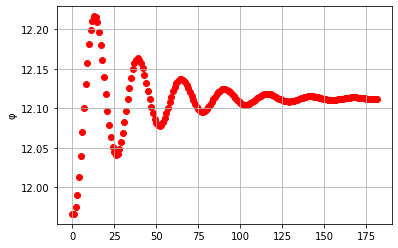

v: 12.11386399642413
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 12.111588053829717
u: 146.74570092386077
g(phi): 146.69056518567072


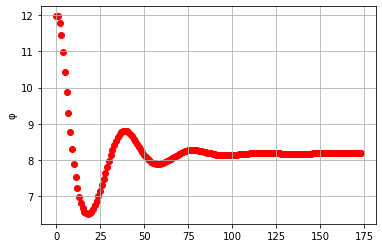

v: 8.105366132163532
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 8.185281894343339
u: 65.69696013642361
g(phi): 66.99883968986488


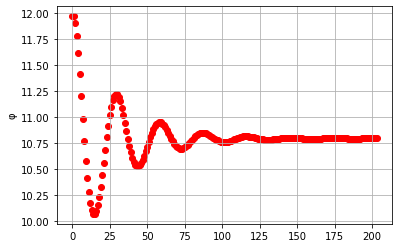

v: 10.778101264591163
vp: 11.96639405628155
sigma_p: 1.9300886624103224
sigma_u: 11.380469157698728
phi: 10.793706249242875
u: 116.16746686978162
g(phi): 116.5040945949447


In [4]:
test_number = 10

for i in range(test_number):
    v = vs[i]
    u = v * v
#     u = 5 * v
    infer_time = 5000
    end = False
    phi = vp
    phi_pre = phi
    phi_pre_2 = phi
    ep = 0
    ep_pre = ep
    ep_pre_2 = ep
    eu = 0
    eu_pre = eu
    eu_pre_2 = eu
    PHIs_1 = []
    PHIs_1.append(phi)
    
    # 推測
    for j in range(1, infer_time):
        phi_pre_3 = phi_pre_2
        phi_pre_2 = phi_pre
        phi_pre = phi
        ep_pre_3 = ep_pre_2
        ep_pre_2 = ep_pre
        ep_pre = ep
        eu_pre_3 = eu_pre_2
        eu_pre_2 = eu_pre
        eu_pre = eu
        phi = phi_pre + dt * (-ep_pre + eu_pre * (2 * phi_pre))
        ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
        eu = eu_pre + dt * (u - phi_pre**2 - sigma_u * eu_pre)

#         phi = phi_pre + dt * (-ep_pre + eu_pre * 2)
#         ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
#         eu = eu_pre + dt * (u - phi_pre*2 - sigma_u * eu_pre)
        
        if j > 3:
            blur = (phi - phi_pre)**2 + (phi_pre - phi_pre_2)**2 + (phi_pre_2 - phi_pre_3)**2
            if blur < blur_lim:
                end = True
            
        if end:
            infer_time = j
            break
            
        PHIs_1.append(phi)
            
    plt.scatter(range(infer_time), PHIs_1, color="r")
    plt.xlabel("")
    plt.ylabel("φ")
    plt.plot()
    plt.grid()
    plt.show()
    
    print("v:", v)
    print("vp:", vp)
    print("sigma_p:", sigma_p)
    print("sigma_u:", sigma_u)
    print("phi:", phi)
    print("u:", u)
    print("g(phi):", phi*phi)

In [5]:
sample_number = 200
us = [np.random.normal(30, np.sqrt(2)) ** 2 for i in range(sample_number)]
# us = [np.random.normal(7, np.sqrt(3)) * 2 for i in range(sample_number)]
PHIs_2 = []

In [6]:
for u in us:
    infer_time = 5000
    end = False
    phi = vp
    phi_pre = phi
    phi_pre_2 = phi
    ep = 0
    ep_pre = ep
    ep_pre_2 = ep
    eu = 0
    eu_pre = eu
    eu_pre_2 = eu
    
    # 推測
    for j in range(1, infer_time):
        phi_pre_3 = phi_pre_2
        phi_pre_2 = phi_pre
        phi_pre = phi
        ep_pre_3 = ep_pre_2
        ep_pre_2 = ep_pre
        ep_pre = ep
        eu_pre_3 = eu_pre_2
        eu_pre_2 = eu_pre
        eu_pre = eu
        phi = phi_pre + dt * (-ep_pre + eu_pre * (2 * phi_pre))
        ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
        eu = eu_pre + dt * (u - phi_pre**2 - sigma_u * eu_pre)

#         phi = phi_pre + dt * (-ep_pre + eu_pre * 2)
#         ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
#         eu = eu_pre + dt * (u - phi_pre*2 - sigma_u * eu_pre)
        
        if j > 3:
            blur = (phi - phi_pre)**2 + (phi_pre - phi_pre_2)**2 + (phi_pre_2 - phi_pre_3)**2
            if blur < blur_lim:
                end = True
            
        
        if end:
            break
    
    PHIs_2.append(phi)

OverflowError: (34, 'Result too large')

In [ ]:
fig1 = plt.figure()
plt.scatter(us, PHIs_2, color="r")
x = np.arange(300)
plt.plot(x, np.sqrt(x))
plt.xlabel("u")
plt.ylabel("φ")
plt.plot()
plt.grid()
# fig1.savefig("before.png")
plt.show()